# Code imports

In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from skimage import io
from skimage import color
from os.path import exists

# Mounting Drive

In [3]:
import os
import sys

isColab = "google.colab" in sys.modules
# this also works: 
# isColab = "COLAB_GPU" in os.environ

if isColab:
    os.environ["SDL_VIDEODRIVER"] = "dummy"
    from google.colab import drive 
    drive.mount("/content/drive", force_remount=True) 

    colab_path = ("/content/drive/Shared drives" + "/CS1470 Final Project")

# Setting up Data Paths

In [4]:
#get path of label file
label_path = "/Users/william 1/Undergrad/browncs/cs1470/final/data/IAUSD-lables.txt"
#get path of images folder
images_path = "/Users/william 1/Undergrad/browncs/cs1470/final/data/batch1/"

if isColab:
    label_path = f"{colab_path}/{label_path}"
    images_path = f"{colab_path}/{images_path}"

# Getting all images of a certain label

In [126]:
def get_specific_class(wantedIndex: int):
    with open(label_path) as file_in:
        lines = []
        imagenumbers = []
        for line in file_in:
            split_line = line.split()
            imagenumbers.append(int(split_line.pop(0)))
            lines.append(split_line)

    final_lines = []
    final_index = []
    for i in range(len(lines)):
      line = lines[i]
      if line[wantedIndex] == "1":
          final_lines.append(np.array(line))
          final_index.append(imagenumbers[i])

    final_return = np.vstack(final_lines)
    
    images = []
    total_added = 0
    for f in final_index:
      # print("num: ", f)
      # if f > 1000:
      #   break
      imagePath = images_path + str(f)+ ".jpg"
      if(exists(imagePath)):
        if total_added > 5:
          break
        image_array = io.imread(imagePath) / 255.
        print(image_array.shape)
        image_array = image_array.astype('float32')
        images.append(image_array)
        # total_added += 1
        

    final_return2 = np.array(images)
    return final_return, final_return2


In [127]:
# 0: Net 
# 1: Start/Restart the game 
# 2: Player emotion
# 3: Yello card	
# 4: Red card 
# 5: Ball 
# 6: Stadium View 
# 7: Referee Image 
# 8: Penalty Image 
# 9: Free Kick
a,b = get_specific_class(1)
# print("Size: ", b.shape)
# for im in b:
#     plt.imshow(im)
#     plt.axis("off")
#     plt.show()
#num pics, width, height, channels

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)


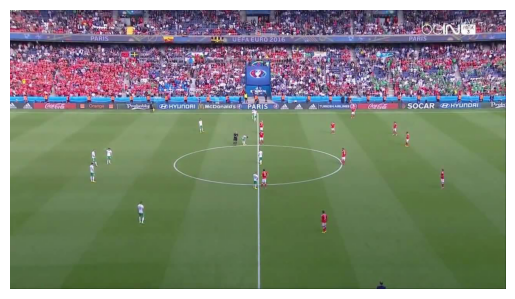

In [129]:
X_train, X_test, _, _ = train_test_split(b,b, test_size=0.25, shuffle=True)

testImage = X_test[0]
plt.imshow(testImage)
plt.axis("off")
plt.show()

# Displaying image

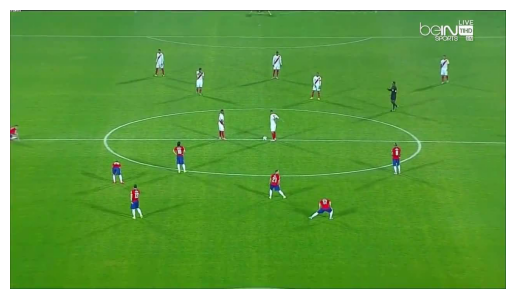

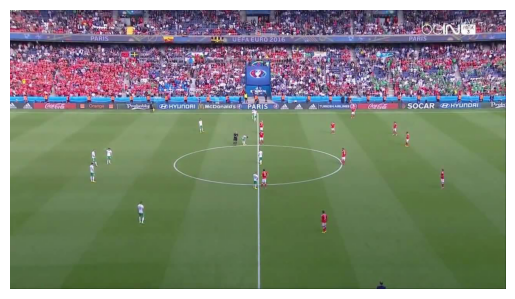

In [130]:
testImage = X_train[0]
plt.imshow(testImage)
plt.axis("off")
plt.show()
trainImage = X_test[0]
plt.imshow(trainImage)
plt.axis("off")
plt.show()

# Autoencoder Model


In [134]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model
from random import randint
import numpy as np

In [135]:
encoder = models.Sequential()

encoder.add(layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=X_train.shape[1:]))
encoder.add(layers.MaxPooling2D(2, strides=2))

encoder.add(layers.Conv2D(64, 3, strides=1, padding='same', activation='relu'))
encoder.add(layers.MaxPooling2D(2, strides=2))

encoder.add(layers.Conv2D(128, 3, strides=1, padding='same', activation='relu'))
encoder.add(layers.MaxPooling2D(2, strides=2))

encoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 720, 1280, 32)     896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 360, 640, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 360, 640, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 180, 320, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 180, 320, 128)     73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 90, 160, 128)      0         
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
__________________________________________________

In [136]:
decoder = models.Sequential()

decoder.add(layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', input_shape=encoder.output.shape[1:]))
decoder.add(layers.UpSampling2D(2))

decoder.add(layers.Conv2D(16, 3, strides=1, padding='same', activation='relu'))
decoder.add(layers.UpSampling2D(2))

decoder.add(layers.Conv2D(3, 3, strides=1, padding='same', activation='relu'))
decoder.add(layers.UpSampling2D(2))

decoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 90, 160, 128)      147584    
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 180, 320, 128)     0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 180, 320, 16)      18448     
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 360, 640, 16)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 360, 640, 3)       435       
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 720, 1280, 3)      0         
Total params: 166,467
Trainable params: 166,467
Non-trainable params: 0
________________________________________________

In [137]:
conv_autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.outputs))

conv_autoencoder.compile(optimizer='adam', loss=losses.mean_squared_error)

history = conv_autoencoder.fit(X_train, X_train, batch_size=64, epochs=40, validation_data=(X_test, X_test))

Epoch 1/40
1/1 [==============================] - 44s 44s/step - loss: 0.1818 - val_loss: 0.1114
Epoch 2/40
1/1 [==============================] - 25s 25s/step - loss: 0.1081 - val_loss: 0.0573
Epoch 3/40
1/1 [==============================] - 22s 22s/step - loss: 0.0549 - val_loss: 0.0952
Epoch 4/40
1/1 [==============================] - 21s 21s/step - loss: 0.0929 - val_loss: 0.0475
Epoch 5/40
1/1 [==============================] - 20s 20s/step - loss: 0.0454 - val_loss: 0.0330
Epoch 6/40
1/1 [==============================] - 21s 21s/step - loss: 0.0320 - val_loss: 0.0308
Epoch 7/40
1/1 [==============================] - 20s 20s/step - loss: 0.0311 - val_loss: 0.0278
Epoch 8/40
1/1 [==============================] - 19s 19s/step - loss: 0.0297 - val_loss: 0.0272
Epoch 9/40
1/1 [==============================] - 20s 20s/step - loss: 0.0306 - val_loss: 0.0283
Epoch 10/40
1/1 [==============================] - 20s 20s/step - loss: 0.0327 - val_loss: 0.0252
Epoch 11/40
1/1 [============

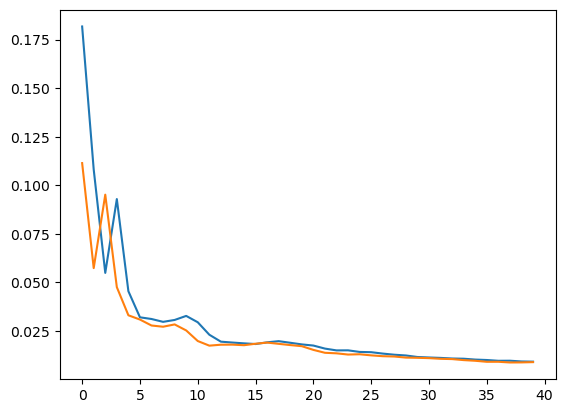

In [138]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

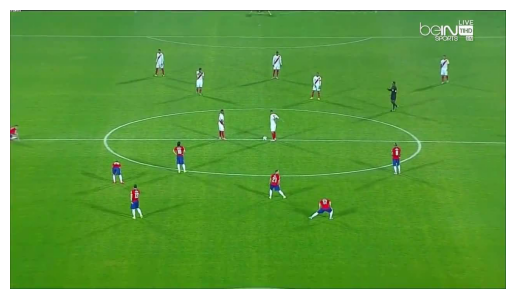

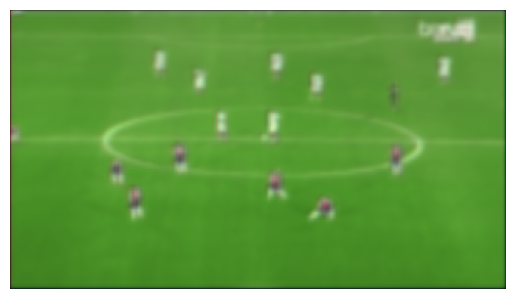

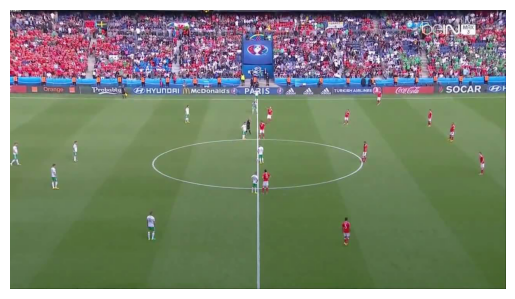

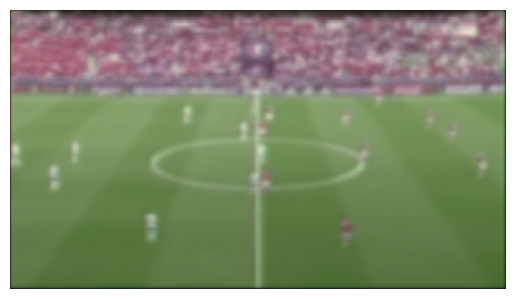

In [139]:
encoded = encoder.predict(X_train)
decoded = decoder.predict(encoded)
plt.imshow(X_train[0])
plt.axis("off")
plt.show()
plt.imshow(decoded[0])
plt.axis("off")
plt.show()

plt.imshow(X_train[1])
plt.axis("off")
plt.show()
plt.imshow(decoded[1])
plt.axis("off")
plt.show()
# plt.figure(figsize=(14,12))
# plt.scatter(encoded[:,0], encoded[:,1], s=2, cmap='hsv')
# plt.colorbar()
# plt.grid()
# plt.show()

(1, 90, 160, 128)
[0.18822202 0.1371402  0.1022262 ]
[0.2628399  0.5142515  0.12720144]


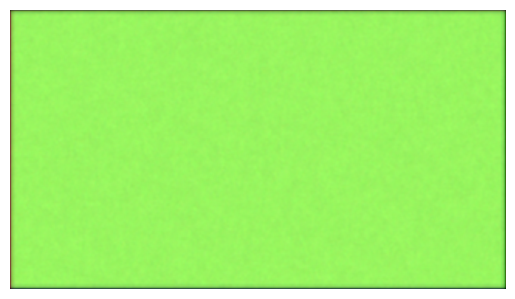

In [144]:
import PIL as Image
mean = np.mean(encoded)
var = np.var(encoded)

z_sample = np.random.normal(loc=mean, scale=var, size=(1,*encoded.shape[1:]))

print(z_sample.shape)
x_decoded = decoder.predict(z_sample)

generated_image = x_decoded[0, :, :, :]
minval = np.min(generated_image)
maxval = np.max(generated_image)
generated_image -= minval
generated_image /= maxval



print(generated_image[0][0])
print(generated_image[2][2])
plt.imshow(generated_image)
plt.axis("off")
plt.show()

In [141]:
from tensorflow.math import exp, sqrt, square
def sample_z(m, v):
    eps = tf.random.normal(shape=(v.shape[0], latent_d))
    return eps * exp(v * 0.5) + m
latent_d = 100
z_mu, z_sigma = layers.Dense(latent_d), layers.Dense(latent_d)
lambda_layer = tf.keras.layers.Lambda(sample_z, output_shape=(latent_d,))

def latent_ops(xp):
    mean = z_mu(xp)
    var = z_sigma(xp)

    return sample_z(mean, var)


## Generation

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(10, 10))

x  = X_train[:5]
print(x.shape)
xp = encoder.predict(x)
zp = latent_ops(xp)
z  = decoder(zp)

min_zp = np.min(zp)
max_zp = np.max(zp)
scale_zp = lambda v: (v - min_zp) / (max_zp - min_zp)

# for i in range(5):
#     axs[0][i].imshow(x[i,:,:,0], cmap='gray')
#     axs[1][i].imshow(tf.reshape(scale_zp(zp[i]), (2, 1)), cmap='gray', vmin=0, vmax=1)
#     axs[2][i].imshow(z[i,:,:,0], cmap='gray')

(5, 720, 1280, 3)


InvalidArgumentError: Incompatible shapes: [5,100] vs. [5,90,160,100] [Op:Mul]

## **Helper Functions**